# Adam Kaba

### Data Exploration

In this notebook I'll be exploring  a dataset from the la times on la neighborhoods. I'll be playing around with various aspects of the data and just tryint to get a feel for it overall. I'll be using a few different functions and maybe making a couple graphs. This data is from http://boundaries.latimes.com/set/la-county-neighborhoods-current/.

First we need to import the geopandas library.

In [1]:
import geopandas as gpd

Next we need to import the shapefile into python.

In [5]:
data = gpd.read_file('l.a. county neighborhood (current).shp')

Now that our data has been read in, I want to get a feel for it

In [16]:
data.shape

(272, 11)

The data appears to have 272 counties, with 11 variables on each county.

In [12]:
data.head()

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,"POLYGON ((-118.20262 34.53899, -118.18947 34.5..."
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"POLYGON ((-118.76193 34.16820, -118.72632 34.1..."
3,agua-dulce,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.4626319451,unincorporated-area,None,None,"POLYGON ((-118.25468 34.55830, -118.25551 34.5..."
4,alhambra,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.62381430605,standalone-city,None,None,"POLYGON ((-118.12175 34.10504, -118.11687 34.1..."


This gives us a closer look at the datas variables, there are 3 different variables containing the cities name. 2 variables containing info on whether or not there was a change in it's belonging to La County. Also included is geometric data 

In [21]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   slug        272 non-null    object  
 1   set         272 non-null    object  
 2   kind        272 non-null    object  
 3   external_i  272 non-null    object  
 4   name        272 non-null    object  
 5   display_na  272 non-null    object  
 6   sqmi        272 non-null    object  
 7   type        272 non-null    object  
 8   name_1      0 non-null      object  
 9   slug_1      0 non-null      object  
 10  geometry    272 non-null    geometry
dtypes: geometry(1), object(10)
memory usage: 23.5+ KB


this tells us that name_1 and slug_1 are missing all their observations, while the rest of the variables have no missing values. On top of this every variable has the object data type, while geometry has the "geometry" data type

In [30]:
data['name'].value_counts()

San Gabriel                 1
Tujunga                     1
Mission Hills               1
West Whittier-Los Nietos    1
Cudahy                      1
                           ..
West Covina                 1
Northridge                  1
Elizabeth Lake              1
Athens                      1
Manhattan Beach             1
Name: name, Length: 272, dtype: int64

Every city/ county is present only once within the dataset, which makes sense given the context of the data.

Since the data includes geometry information we can plot it.

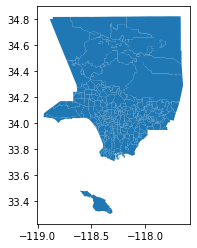

In [43]:
newdata.plot()

This is a map/plot of the geographic reigon given by the data

Since there a lot of data we might not care about lets trim it.

In [88]:
newdata = data[['name','sqmi','geometry']]
newdata

,name,sqmi,geometry
0,Acton,39.3391089485,"POLYGON ((-118.20262 34.53899, -118.18947 34.5..."
1,Adams-Normandie,0.805350187789,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
2,Agoura Hills,8.14676029818,"POLYGON ((-118.76193 34.16820, -118.72632 34.1..."
3,Agua Dulce,31.4626319451,"POLYGON ((-118.25468 34.55830, -118.25551 34.5..."
4,Alhambra,7.62381430605,"POLYGON ((-118.12175 34.10504, -118.11687 34.1..."
...,...,...,...
267,Willowbrook,3.76636072646,"POLYGON ((-118.23005 33.92809, -118.22803 33.9..."
268,Wilmington,9.1412927044,"POLYGON ((-118.22476 33.82461, -118.22458 33.8..."
269,Windsor Square,0.683463802484,"POLYGON ((-118.31371 34.07631, -118.31381 34.0..."
270,Winnetka,4.77724070209,"POLYGON ((-118.56221 34.23150, -118.56212 34.2..."


In [89]:
newdata = newdata.query("sqmi < '10'")
newdata

,name,sqmi,geometry
1,Adams-Normandie,0.805350187789,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
5,Alondra Park,1.13989423058,"POLYGON ((-118.32651 33.89757, -118.32649 33.8..."
10,Arlington Heights,1.03141523527,"POLYGON ((-118.31591 34.05261, -118.31341 34.0..."
11,Artesia,1.63220417689,"POLYGON ((-118.07490 33.88038, -118.07502 33.8..."
12,Athens,1.33275332251,"POLYGON ((-118.29166 33.93096, -118.29152 33.9..."
...,...,...,...
259,West Los Angeles,1.04957313159,"POLYGON ((-118.43421 34.03731, -118.43504 34.0..."
260,Westmont,1.84381583493,"POLYGON ((-118.29247 33.95951, -118.29160 33.9..."
261,West Puente Valley,1.85662447271,"POLYGON ((-117.96997 34.06552, -117.97011 34.0..."
262,West San Dimas,0.32978537849,"POLYGON ((-117.82518 34.09130, -117.82420 34.0..."


Now we have a much cleaner data set containing only counties with a square mileage of less than 10. Information given is the counties' name, square mileage and geometry data

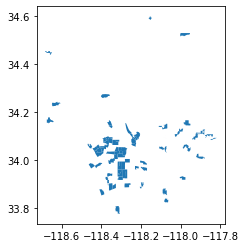

In [90]:
newdata.plot()

This shows where the smaller counties are in relation to the previous plot.